<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#### Read the dataset in the csv file from the URL


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [20]:
# Task 1: Familiarize yourself with the dataset
boston_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

# Task 2: Generate basic statistics and visualizations for upper management
# Basic statistics
print(boston_df.describe())

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

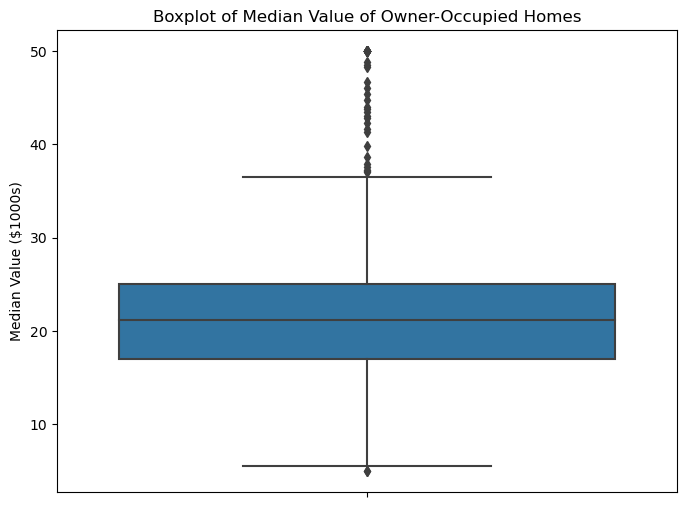

In [21]:
# Boxplot for "Median value of owner-occupied homes"
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()

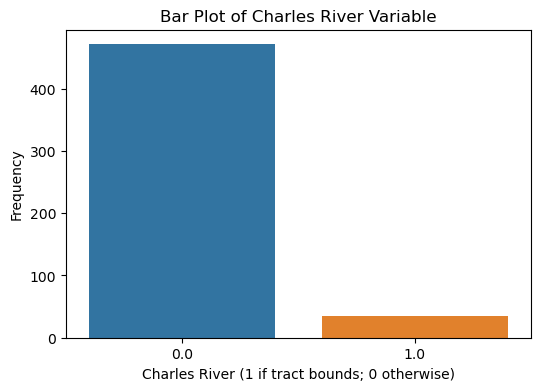

In [22]:
# Visualizations
# Bar plot for "Charles river" variable
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (1 if tract bounds; 0 otherwise)')
plt.ylabel('Frequency')
plt.show()

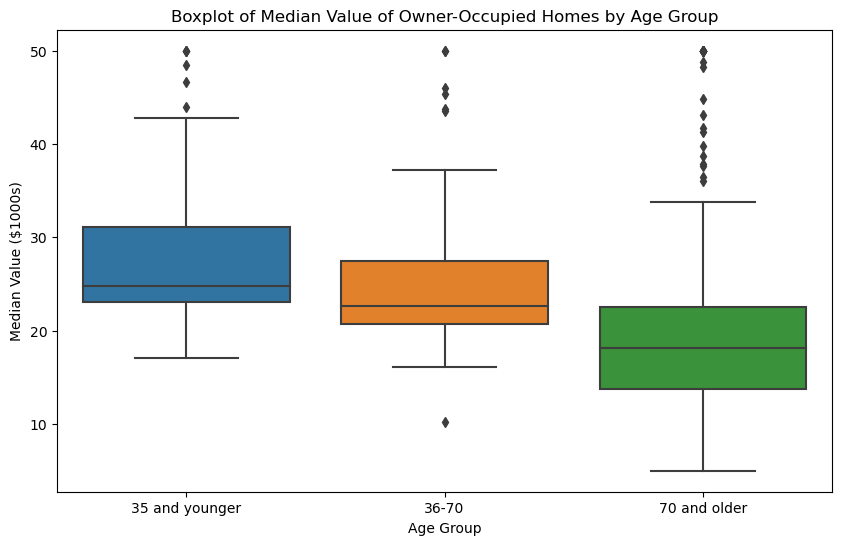

In [23]:
# Boxplot for "MEDV" variable vs "AGE" variable
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, np.inf], labels=['35 and younger', '36-70', '70 and older'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

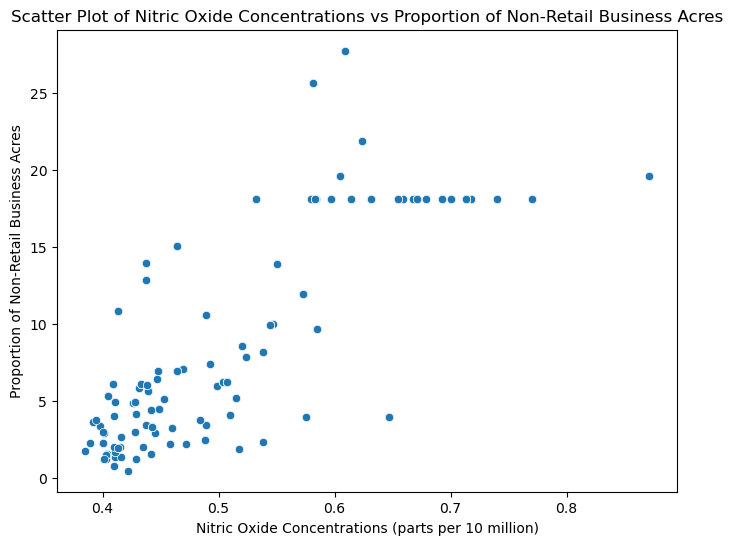

In [24]:
# Scatter plot for Nitric oxide concentrations vs Proportion of non-retail business acres
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()


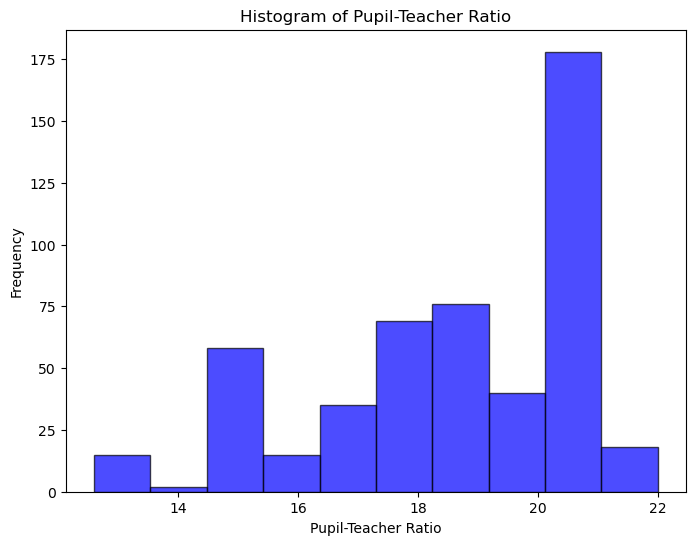

In [25]:

# Histogram for "PTRATIO" variable
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Task 3: Use the appropriate tests to answer the questions provided
# Set significance level (alpha)
alpha = 0.05

# T-test for "Median value of houses bounded by the Charles river"
charles_river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
charles_river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(charles_river_yes, charles_river_no)
print("\nT-test for Median Value of Houses Bounded by the Charles River:")
print("T-statistic:", t_stat)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles river.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median value of houses bounded by the Charles river.")



T-test for Median Value of Houses Bounded by the Charles River:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles river.


In [31]:
# ANOVA for "Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)"
model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = anova_lm(model)
print("\nANOVA for Median Values of Houses by Age Group:")
print(anova_table)
p_value = anova_table['PR(>F)'][0]
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values of houses for each age group.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values of houses for each age group.")



ANOVA for Median Values of Houses by Age Group:
                 df        sum_sq      mean_sq         F        PR(>F)
C(AGE_group)    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual      503.0  37314.563532    74.184023       NaN           NaN
Reject the null hypothesis: There is a significant difference in median values of houses for each age group.


In [32]:
# Pearson correlation for "Nitric oxide concentrations and proportion of non-retail business acres per town"
correlation = boston_df['NOX'].corr(boston_df['INDUS'])
print("\nPearson correlation coefficient between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres:", correlation)
if abs(correlation) < alpha:
    print("Fail to reject the null hypothesis: There is no significant correlation between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres.")
else:
    print("Reject the null hypothesis: There is a significant correlation between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres.")



Pearson correlation coefficient between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres: 0.7636514469209147
Reject the null hypothesis: There is a significant correlation between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres.


In [33]:
# Regression analysis for "Impact of additional weighted distance to Boston's five employment centres on median value of owner occupied homes"
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nRegression Analysis for Impact of Additional Weighted Distance to Boston's Five Employment Centres on Median Value of Owner Occupied Homes:")
print(model.summary())



Regression Analysis for Impact of Additional Weighted Distance to Boston's Five Employment Centres on Median Value of Owner Occupied Homes:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        01:26:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

In [ ]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
